In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.style.use("default")
sns.set_context("notebook")

In [2]:
df = pd.read_csv('../data/superstore.csv',encoding = 'utf-8')
df.head(1)

,Category,City,Country,Customer.ID,Customer.Name,Discount,Market,记录数,Order.Date,Order.ID,...,Sales,Segment,Ship.Date,Ship.Mode,Shipping.Cost,State,Sub.Category,Year,Market2,weeknum
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,1,2011-01-07 00:00:00.000,CA-2011-130813,...,19,Consumer,2011-01-09 00:00:00.000,Second Class,4.37,California,Paper,2011,North America,2


## Here is a description of the columns in the dataset:

1. category: The category of products sold in the superstore.
2. city: The city where the order was placed.
3. country: The country in which the superstore is located.
4. customer_id: A unique identifier for each customer.
5. customer_name: The name of the customer who placed the order.
6. discount: The discount applied to the order.
7. market: The market or region where the superstore operates.
8. 记录数: An unknown or unspecified column.
9. order_date: The date when the order was placed.
10. order_id: A unique identifier for each order.
11. order_priority: The priority level of the order.
12. product_id: A unique identifier for each product.
13. product_name: The name of the product.
14. profit: The profit generated from the order.
15. quantity: The quantity of products ordered.
16. region: The region where the order was placed.
17. row_id: A unique identifier for each row in the dataset.
18. sales: The total sales amount for the order.
19. segment: The customer segment (e.g., consumer, corporate, or home office).
20. ship_date: The date when the order was shipped.
21. ship_mode: The shipping mode used for the order.
22. shipping_cost: The cost of shipping for the order.
23. state: The state or region within the country.
24. sub_category: The sub-category of products within the main category.
25. year: The year in which the order was placed.
26. market2: Another column related to market information.
27. weeknum: The week number when the order was placed.

In [3]:
df.columns

Index(['Category', 'City', 'Country', 'Customer.ID', 'Customer.Name',
       'Discount', 'Market', '记录数', 'Order.Date', 'Order.ID', 'Order.Priority',
       'Product.ID', 'Product.Name', 'Profit', 'Quantity', 'Region', 'Row.ID',
       'Sales', 'Segment', 'Ship.Date', 'Ship.Mode', 'Shipping.Cost', 'State',
       'Sub.Category', 'Year', 'Market2', 'weeknum'],
      dtype='object')

In [4]:
df.drop('记录数',axis=1,inplace=True)

In [5]:
df.columns

Index(['Category', 'City', 'Country', 'Customer.ID', 'Customer.Name',
       'Discount', 'Market', 'Order.Date', 'Order.ID', 'Order.Priority',
       'Product.ID', 'Product.Name', 'Profit', 'Quantity', 'Region', 'Row.ID',
       'Sales', 'Segment', 'Ship.Date', 'Ship.Mode', 'Shipping.Cost', 'State',
       'Sub.Category', 'Year', 'Market2', 'weeknum'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Category        51290 non-null  object 
 1   City            51290 non-null  object 
 2   Country         51290 non-null  object 
 3   Customer.ID     51290 non-null  object 
 4   Customer.Name   51290 non-null  object 
 5   Discount        51290 non-null  float64
 6   Market          51290 non-null  object 
 7   Order.Date      51290 non-null  object 
 8   Order.ID        51290 non-null  object 
 9   Order.Priority  51290 non-null  object 
 10  Product.ID      51290 non-null  object 
 11  Product.Name    51290 non-null  object 
 12  Profit          51290 non-null  float64
 13  Quantity        51290 non-null  int64  
 14  Region          51290 non-null  object 
 15  Row.ID          51290 non-null  int64  
 16  Sales           51290 non-null  int64  
 17  Segment         51290 non-null 

##### Observation: The dataset is complete with no missing values, which reduces the risk of biased aggregations.

In [7]:
df['Order.Date'] = pd.to_datetime(df['Order.Date'])
df['Ship.Date'] = pd.to_datetime(df['Ship.Date'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Category        51290 non-null  object        
 1   City            51290 non-null  object        
 2   Country         51290 non-null  object        
 3   Customer.ID     51290 non-null  object        
 4   Customer.Name   51290 non-null  object        
 5   Discount        51290 non-null  float64       
 6   Market          51290 non-null  object        
 7   Order.Date      51290 non-null  datetime64[ns]
 8   Order.ID        51290 non-null  object        
 9   Order.Priority  51290 non-null  object        
 10  Product.ID      51290 non-null  object        
 11  Product.Name    51290 non-null  object        
 12  Profit          51290 non-null  float64       
 13  Quantity        51290 non-null  int64         
 14  Region          51290 non-null  object        
 15  Ro

In [9]:
df.columns = df.columns.str.lower().str.replace(' ','_').str.replace('.','_')

In [10]:
df.columns

Index(['category', 'city', 'country', 'customer_id', 'customer_name',
       'discount', 'market', 'order_date', 'order_id', 'order_priority',
       'product_id', 'product_name', 'profit', 'quantity', 'region', 'row_id',
       'sales', 'segment', 'ship_date', 'ship_mode', 'shipping_cost', 'state',
       'sub_category', 'year', 'market2', 'weeknum'],
      dtype='object')

In [11]:
df['order_year'] = df['order_date'].dt.year
df['order_month'] = df['order_date'].dt.month
df['order_month_name'] = df['order_date'].dt.month_name()
df['delivery_days'] = (df['ship_date']-df['order_date']).dt.days
df['profit_margin'] = df['profit']/df['sales']
df['discount_flag'] = df['discount'].apply(lambda x: 1 if x>0 else 0)

In [12]:
df.head(2)

,category,city,country,customer_id,customer_name,discount,market,order_date,order_id,order_priority,...,sub_category,year,market2,weeknum,order_year,order_month,order_month_name,delivery_days,profit_margin,discount_flag
0,Office Supplies,Los Angeles,United States,LS-172304,Lycoris Saunders,0.0,US,2011-01-07,CA-2011-130813,High,...,Paper,2011,North America,2,2011,1,January,2,0.491116,0
1,Office Supplies,Los Angeles,United States,MV-174854,Mark Van Huff,0.0,US,2011-01-21,CA-2011-148614,Medium,...,Paper,2011,North America,4,2011,1,January,5,0.489095,0


In [13]:
df[df['delivery_days'] < 0]

,category,city,country,customer_id,customer_name,discount,market,order_date,order_id,order_priority,...,sub_category,year,market2,weeknum,order_year,order_month,order_month_name,delivery_days,profit_margin,discount_flag


##### Observation: There are no days where the delivery days is less than 0 which means all data provided is correct and can be used further for processing

In [14]:
df['discount'].describe()

count    51290.000000
mean         0.142908
std          0.212280
min          0.000000
25%          0.000000
50%          0.000000
75%          0.200000
max          0.850000
Name: discount, dtype: float64

In [15]:
df.duplicated().sum()

np.int64(0)

##### Observation: No duplicated entries

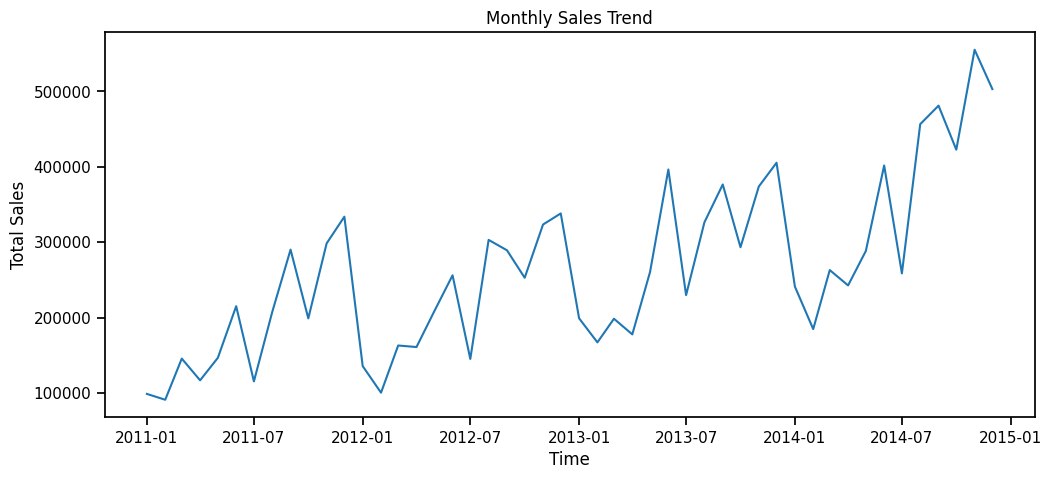

In [16]:
def plot_monthly_sales(df):
    monthly = (
        df.groupby(['order_year', 'order_month'])['sales']
          .sum()
          .reset_index()
    )

    monthly['year_month'] = pd.to_datetime(
        monthly['order_year'].astype(str) + '-' + monthly['order_month'].astype(str)
    )

    plt.figure(figsize=(12,5))
    plt.plot(monthly['year_month'], monthly['sales'])
    plt.title("Monthly Sales Trend")
    plt.xlabel("Time")
    plt.ylabel("Total Sales")
    plt.show()
plot_monthly_sales(df)

#### What the plot shows
- Sales increase over time with visible seasonality.
- Peak sales occur in specific months (usually Q4).

#### Insight
- Sales show a steady upward trend over the years, indicating business growth. Seasonal spikes suggest higher demand during specific months, likely driven by promotions or festive periods.

#### Business implication
- Inventory and marketing spend should be increased during peak months.
- Forecasting models should incorporate seasonality.

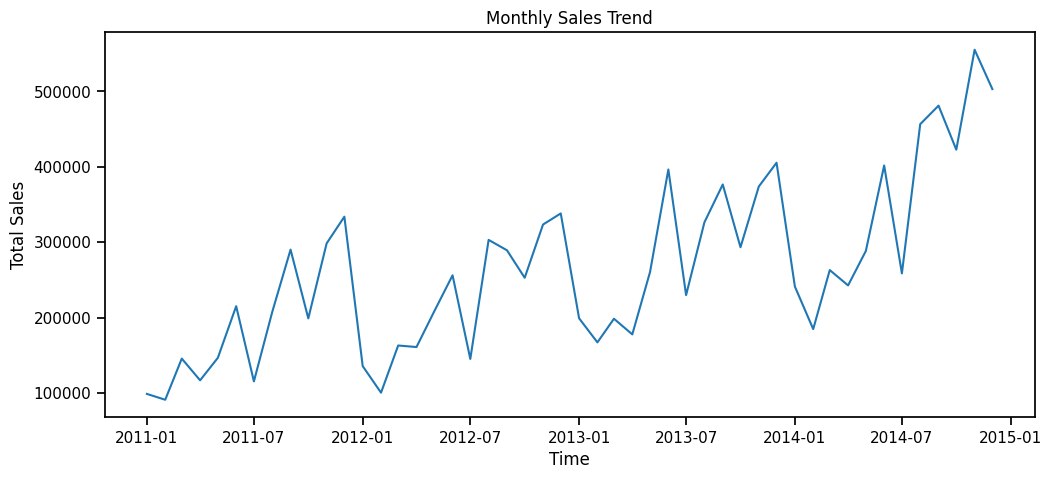

In [17]:
def plot_monthly_sales(df):
    monthly = (
        df.groupby(['order_year', 'order_month'])['sales']
          .sum()
          .reset_index()
    )

    monthly['year_month'] = pd.to_datetime(
        monthly['order_year'].astype(str) + '-' + monthly['order_month'].astype(str)
    )

    plt.figure(figsize=(12,5))
    plt.plot(monthly['year_month'], monthly['sales'])
    plt.title("Monthly Sales Trend")
    plt.xlabel("Time")
    plt.ylabel("Total Sales")
    plt.show()

plot_monthly_sales(df)

#### What the plot shows
- Profit does not always move in line with sales.
- Some months show high sales but low or negative profit.

#### Insight
- Profit growth is inconsistent compared to sales, indicating that higher revenue does not always translate into higher profitability. This suggests cost or discount inefficiencies during certain periods.

#### Business implication
- Focus on profit optimization, not just revenue growth.
- Review discounting and shipping costs during low-profit months.

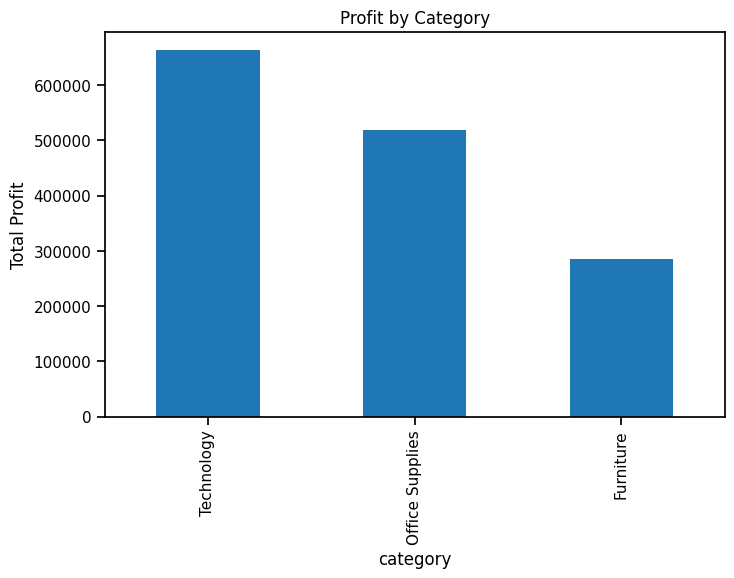

In [18]:
def plot_profit_by_category(df):
    category_profit = (
        df.groupby('category')['profit']
          .sum()
          .sort_values(ascending=False)
    )

    plt.figure(figsize=(8,5))
    category_profit.plot(kind='bar')
    plt.title("Profit by Category")
    plt.ylabel("Total Profit")
    plt.show()
plot_profit_by_category(df)

#### What the plot shows
- Technology and Office Supplies contribute most of the profit.
- Furniture has significantly lower or negative profit.

#### Insight
- While Furniture generates substantial revenue, it underperforms in profitability compared to Technology and Office Supplies, making it a potential loss-driving category.

#### Business implication
- Reassess pricing and discount strategies for Furniture.
- Prioritize high-margin categories in marketing efforts.

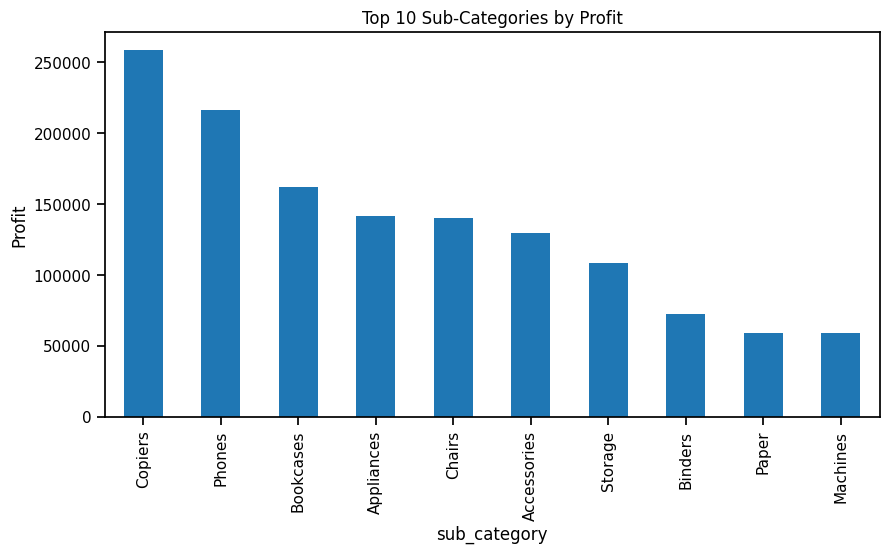

In [19]:
def plot_top_subcategories(df, n=10):
    subcat_profit = (
        df.groupby('sub_category')['profit']
          .sum()
          .sort_values(ascending=False)
          .head(n)
    )

    plt.figure(figsize=(10,5))
    subcat_profit.plot(kind='bar')
    plt.title(f"Top {n} Sub-Categories by Profit")
    plt.ylabel("Profit")
    plt.show()
plot_top_subcategories(df)

#### What the plot shows
- A small number of sub-categories drive a large portion of profit.
- Some sub-categories consistently underperform.

#### Insight
- Profit is concentrated in a few sub-categories, following a Pareto-like distribution, where a minority of products generate most of the profit.

#### Business implication
- Focus inventory and promotions on high-performing sub-categories.
- Consider discontinuing or repricing low-performing ones.

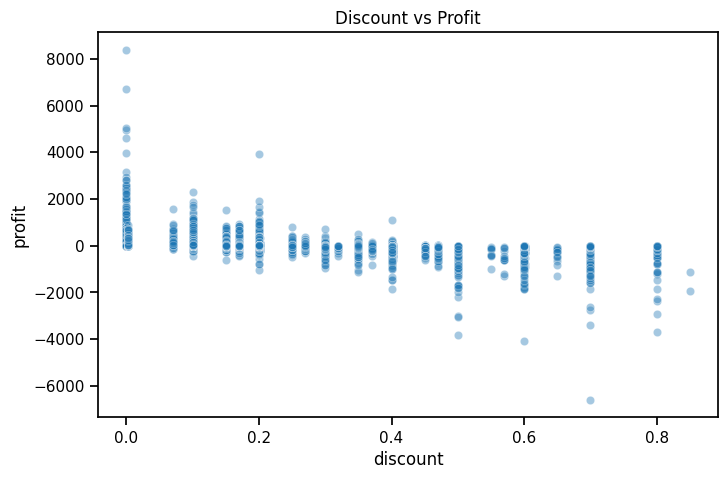

In [20]:
def plot_discount_vs_profit(df):
    plt.figure(figsize=(8,5))
    sns.scatterplot(
        data=df,
        x='discount',
        y='profit',
        alpha=0.4
    )
    plt.title("Discount vs Profit")
    plt.show()
plot_discount_vs_profit(df)

#### What the plot shows
- Clear negative relationship between discount and profit.
- High discounts often lead to losses.

#### Insight
- Higher discounts are strongly associated with negative profit, indicating that aggressive discounting erodes margins without guaranteeing proportional sales growth.

#### Business implication
- Implement discount caps.
- Use targeted discounts instead of blanket promotions.

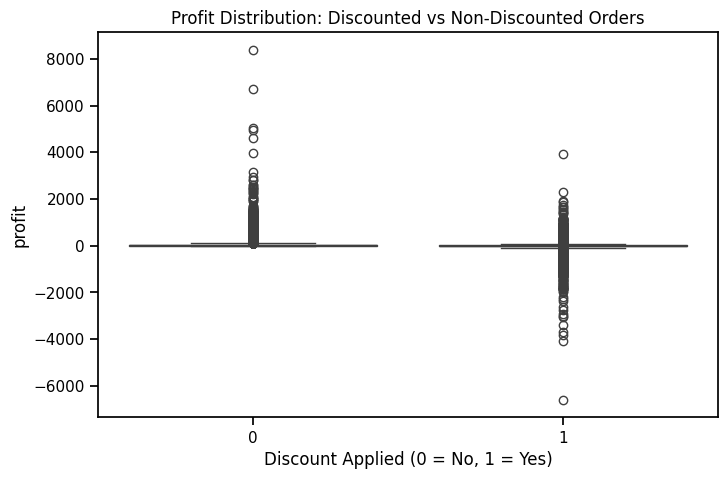

In [21]:
def plot_profit_by_discount_flag(df):
    plt.figure(figsize=(8,5))
    sns.boxplot(
        data=df,
        x='discount_flag',
        y='profit'
    )
    plt.title("Profit Distribution: Discounted vs Non-Discounted Orders")
    plt.xlabel("Discount Applied (0 = No, 1 = Yes)")
    plt.show()
plot_profit_by_discount_flag(df)

#### What the plot shows
- Orders without discounts have higher median profit.
- Discounted orders show wider loss distribution.

#### Insight
- Non-discounted orders are consistently more profitable, while discounted orders show high variance and frequent losses.

#### Business implication
- Encourage full-price purchases through value-based offerings.
- Restrict discounts to specific products or customers.

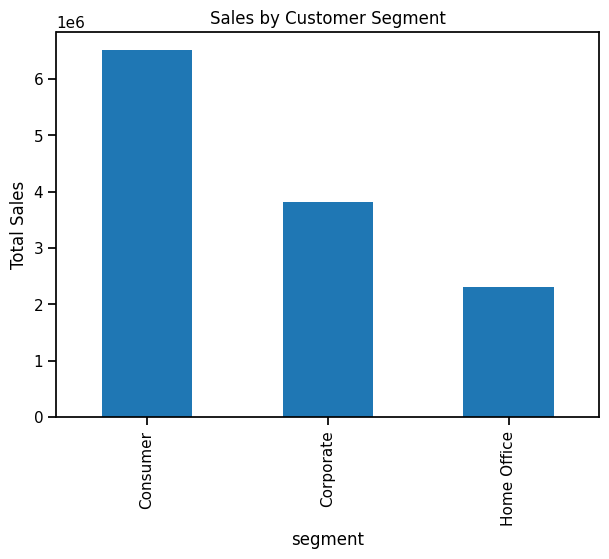

In [22]:
def plot_sales_by_segment(df):
    segment_sales = (
        df.groupby('segment')['sales']
          .sum()
          .sort_values(ascending=False)
    )

    plt.figure(figsize=(7,5))
    segment_sales.plot(kind='bar')
    plt.title("Sales by Customer Segment")
    plt.ylabel("Total Sales")
    plt.show()
plot_sales_by_segment(df)

#### What the plot shows
- Consumer segment has the highest total sales.
- Corporate and Home Office segments differ in profitability.

#### Insight
- The Consumer segment contributes the highest sales volume, while the Corporate segment tends to generate more stable and higher-value transactions.

#### Business implication
- Maintain volume strategy for Consumers.
- Target Corporate customers for high-margin deals.

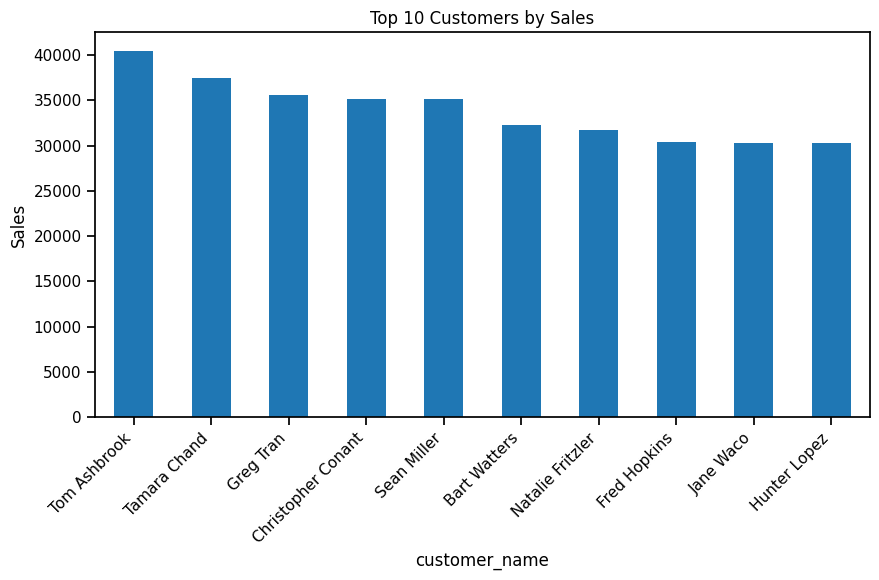

In [23]:
def plot_top_customers(df, n=10):
    top_customers = (
        df.groupby('customer_name')['sales']
          .sum()
          .sort_values(ascending=False)
          .head(n)
    )

    plt.figure(figsize=(10,5))
    top_customers.plot(kind='bar')
    plt.title(f"Top {n} Customers by Sales")
    plt.ylabel("Sales")
    plt.xticks(rotation=45, ha='right')
    plt.show()

plot_top_customers(df)

#### What the plot shows
- A small number of customers contribute disproportionately to revenue.

#### Insight
- Revenue is highly concentrated among a small group of top customers, indicating dependence on key accounts.

#### Business implication
- Strengthen relationships with top customers.
- Reduce risk by expanding the mid-tier customer base.

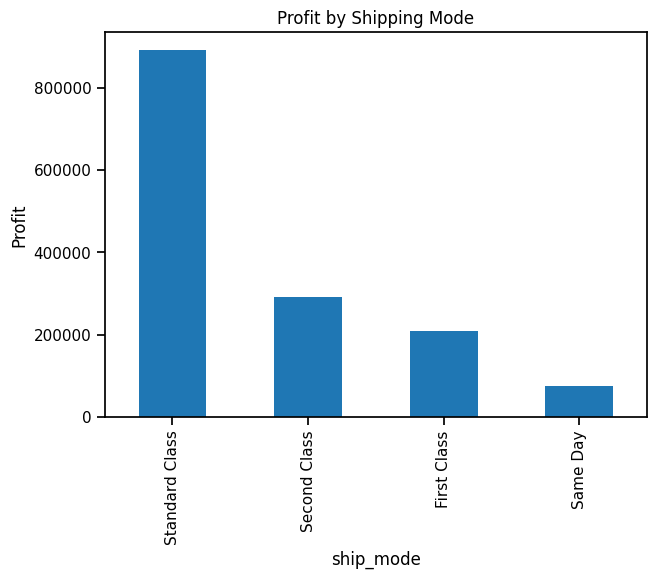

In [24]:
def plot_profit_by_ship_mode(df):
    ship_profit = (
        df.groupby('ship_mode')['profit']
          .sum()
          .sort_values(ascending=False)
    )

    plt.figure(figsize=(7,5))
    ship_profit.plot(kind='bar')
    plt.title("Profit by Shipping Mode")
    plt.ylabel("Profit")
    plt.show()
plot_profit_by_ship_mode(df)

#### What the plot shows
- Standard and Second Class shipping are more profitable.
- Same Day shipping shows lower profit contribution.

#### Insight
- Faster shipping modes tend to reduce profitability due to higher shipping costs without corresponding revenue gains.

#### Business implication
- Promote cost-effective shipping options.
- Restrict Same Day delivery to high-value orders.

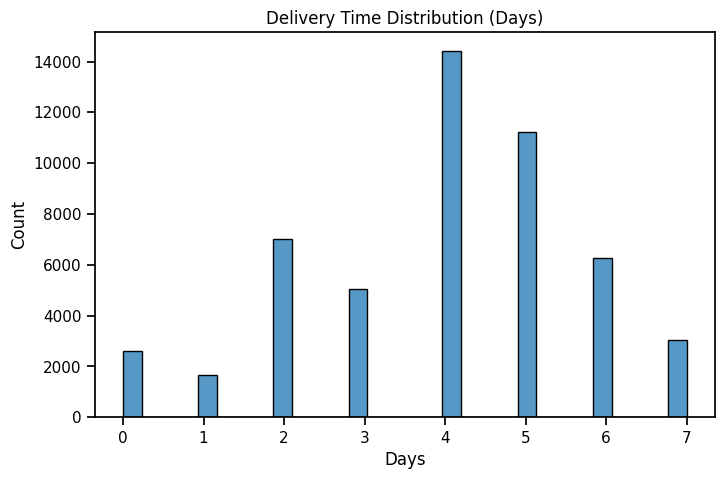

In [25]:
def plot_delivery_time_distribution(df):
    plt.figure(figsize=(8,5))
    sns.histplot(df['delivery_days'], bins=30)
    plt.title("Delivery Time Distribution (Days)")
    plt.xlabel("Days")
    plt.show()
plot_delivery_time_distribution(df)

#### What the plot shows
- Most orders are delivered within a few to moderate days maximum being in the range of (0-4).
- Very long delivery (6-7 days) times and very short delivery (0-1 day) times are rare.

#### Insight
- The majority of orders are delivered within an acceptable timeframe, indicating operational efficiency with occasional outliers.

#### Business implication
- Monitor delayed orders to improve customer satisfaction.
- Use delivery benchmarks as KPIs.

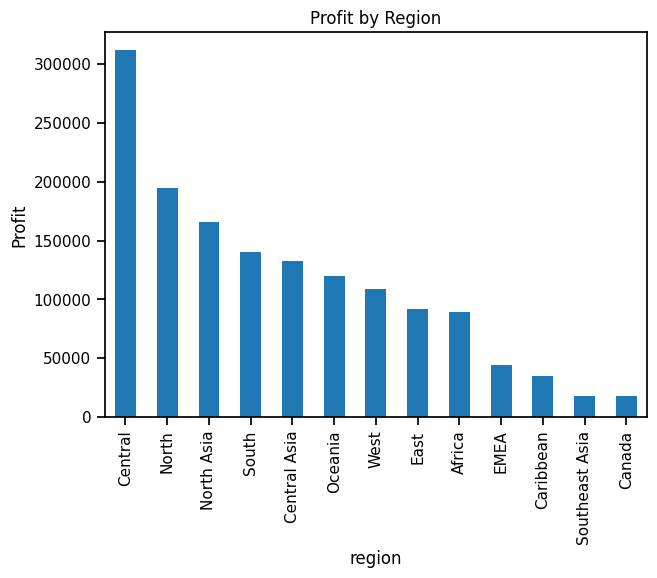

In [26]:
def plot_profit_by_region(df):
    region_profit = (
        df.groupby('region')['profit']
          .sum()
          .sort_values(ascending=False)
    )

    plt.figure(figsize=(7,5))
    region_profit.plot(kind='bar')
    plt.title("Profit by Region")
    plt.ylabel("Profit")
    plt.show()

plot_profit_by_region(df)

#### What the plot shows
- Some regions generate high sales but lower profit margins.
- Profitability varies significantly across regions.

#### Insight
- Regional performance varies, with certain regions delivering strong revenue (like Central Region and North region) but weaker profit margins due to operational or pricing challenges (like Canada region and Southeast Asian region).

#### Business implication
- Apply region-specific pricing and logistics strategies.
- Optimize supply chain costs in low-margin regions.

# Final conversion of clean data to a new csv file

In [27]:
df.to_csv('../data/superstore_cleaned.csv', index=False)

In [28]:
!pip install sqlalchemy pymysql

In [29]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [30]:
df.isna().sum()


category            0
city                0
country             0
customer_id         0
customer_name       0
discount            0
market              0
order_date          0
order_id            0
order_priority      0
product_id          0
product_name        0
profit              0
quantity            0
region              0
row_id              0
sales               0
segment             0
ship_date           0
ship_mode           0
shipping_cost       0
state               0
sub_category        0
year                0
market2             0
weeknum             0
order_year          0
order_month         0
order_month_name    0
delivery_days       0
profit_margin       1
discount_flag       0
dtype: int64

In [32]:
df['discount'].unique()

array([0.   , 0.15 , 0.1  , 0.35 , 0.6  , 0.65 , 0.7  , 0.5  , 0.3  ,
       0.2  , 0.4  , 0.8  , 0.85 , 0.45 , 0.27 , 0.17 , 0.37 , 0.47 ,
       0.25 , 0.57 , 0.55 , 0.07 , 0.002, 0.602, 0.202, 0.402, 0.32 ])

In [33]:
df.columns

Index(['category', 'city', 'country', 'customer_id', 'customer_name',
       'discount', 'market', 'order_date', 'order_id', 'order_priority',
       'product_id', 'product_name', 'profit', 'quantity', 'region', 'row_id',
       'sales', 'segment', 'ship_date', 'ship_mode', 'shipping_cost', 'state',
       'sub_category', 'year', 'market2', 'weeknum', 'order_year',
       'order_month', 'order_month_name', 'delivery_days', 'profit_margin',
       'discount_flag'],
      dtype='object')

In [34]:
df.to_csv('../data/superstore_cleaned.csv', index=False)

In [31]:
import pymysql
import pandas as pd
from sqlalchemy import create_engine

# # # Connect manually
conn = pymysql.connect(
        host='localhost',
        user='root',
        password='Coderop@12',
        database='superstore_sales_data'
)

# # # Use SQLAlchemy engine with connection
engine = create_engine('mysql+pymysql://', creator=lambda: conn)

# # # Insert DataFrame
df.to_sql(
    'superstore_cleaned',
    con=engine,
    if_exists='append',
    index=False,
    chunksize=1000
)

print(f"Inserted successfully")


Inserted successfully
